In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def euler(f, x0, x1, y0, h):
    n = int((x1 - x0) / h)
    x = np.linspace(x0, x1, n)
    y = np.zeros(n)
    y[0] = y0

    for i in range(0, n - 1):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    
    return (x, y)

def rk2(f, x0, x1, y0, h):
    n = int((x1 - x0) / h)
    print(n)
    x = np.linspace(x0, x1, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(0, n - 1):
        y[i + 1] = y[i] + (h / 2) * (f(x[i], y[i]) + f(x[i + 1], (y[i] + h * f(x[i], y[i]))))
    
    return (x, y)

f = lambda x, y: 0.2 * x * y

4
[0. 1. 2. 3. 4.] [1.        1.1       1.474     2.38788   4.6324872]


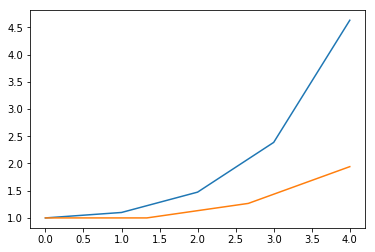

In [18]:
(x, y) = rk2(f, 0, 4, 1, 1)
(x1, y1) = euler(f, 0, 4, 1, 1)
print(x, y)
plt.plot(x, y)
plt.plot(x1, y1)